Notebook to search experiment using the HPC

In [2]:


import os
os.chdir('c:\\Users\\ma11115\\OneDrive - Imperial College London\\github_folder\\STK_SEARCH\\')
#os.chdir('/rds/general/user/ma11115/home/BO_polymers')
import sys  
#sys.path.insert(0, '/rds/general/user/ma11115/home/BO_polymers/Scripts')


In [5]:

import Search_Exp
import numpy as np
from Scripts.Search_algorithm import Search_Algorithm
from Scripts.Search_algorithm import Bayesian_Optimisation
import Search_algorithm
import Objective_function
import importlib
importlib.reload(Search_Exp)
importlib.reload(Search_algorithm)
importlib.reload(Objective_function)
def run_search():
    search_space_loc = "Inputs/exp1_2023_09_05_14_47_02/search_space_5.pkl"
    objective_function = Objective_function.IP_ES1_fosc(oligomer_size=6)
    search_algorithm = Search_algorithm.Bayesian_Optimisation()
    search_algorithm.which_acquisition='LOG_EI'
    number_of_iterations = 5

    S_exp =Search_Exp.Search_exp(search_space_loc, search_algorithm, objective_function, number_of_iterations,verbose= False)
    S_exp.benchmark = True
    S_exp.df_total = df_total
    S_exp.num_elem_initialisation= 5
    #S_exp.initialise_search_space()
    S_exp.run_seach()

In [6]:
search_space_loc = "Inputs/exp1_2023_09_05_14_47_02/search_space_5.pkl"
objective_function = Objective_function.IP_ES1_fosc(oligomer_size=6)
search_algorithm = Search_algorithm.Bayesian_Optimisation()
search_algorithm.which_acquisition='LOG_EI'
number_of_iterations = 5

S_exp =Search_Exp.Search_exp(search_space_loc, search_algorithm, objective_function, number_of_iterations,verbose= True)
S_exp.output_folder

'Data/search_experiment'

In [4]:
import pandas as pd
def prepare_df_for_plot(df_total_new:pd.DataFrame=[]):
    df_test=df_total_new
    for id,x in df_test.iterrows():
        #print(x)
        if len(eval(x['BB']))<6:
            df_test.drop(id,inplace=True)
    for i in range(6):
        df_test[f'InChIKey_{i}']=df_test[f'BB'].apply(lambda x: eval(x)[i]['InChIKey'])
    df_precursors = pd.read_pickle('Data/calculation_data_precursor_310823_clean.pkl')
    features_frag = df_precursors.columns[1:7].append(df_precursors.columns[17:23])
    features_frag = features_frag.append(df_precursors.columns[0:1])
    for i in range(6):
        df_test=df_test.merge(df_precursors[features_frag].add_suffix(f'_{i}'), on=f'InChIKey_{i}', how='left')
    return df_test, df_precursors
df_total = pd.read_csv('Data/df_total_new.csv2023_08_20')
df_total.dropna(subset=['fosc1','BB'],inplace=True)
df_total=df_total[df_total['fosc1']>0]
df_total=df_total[df_total['fosc1']<11]
df_total['target'] = -np.abs(df_total['ionisation potential (eV)'].values-5.5)-1*np.abs(df_total['fosc1'].values-10)-0.5*np.abs(df_total['ES1'].values-3)
df_total, df_precursors=prepare_df_for_plot(df_total)


/var/tmp/pbs.8213090.pbs/ipykernel_3125206/1181780217.py:16: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_total = pd.read_csv('Data/df_total_new.csv2023_08_20')


FileNotFoundError: [Errno 2] No such file or directory: 'Data/calculation_data_precursor_310823_clean.pkl'

In [31]:


S_exp.search_space.redefine_search_space()
print(S_exp.search_space.check_df_for_element_from_SP(df_to_check=df_total).shape)
print(S_exp.df_search_space.shape)
S_exp.search_space.check_df_for_element_from_SP(df_to_check=df_total).head()
S_exp.df_searched_space.dropna(subset=['target']).shape

space too big but will take element randomly
shape of the dataframe (1318200, 42)
(37, 100)
(31, 42)


(37, 100)

In [119]:
S_exp.num_elem_initialisation = 1
element_id = S_exp.search_algorithm.initial_suggestion(
            search_space_df=S_exp.df_search_space,
            num_elem_initialisation=S_exp.num_elem_initialisation,
        )
element = S_exp.df_search_space.loc[[element_id[0]], :]
#results = element.merge(S_exp.df_searched_space,on=[f'InChIKey_{i}' for i in range(6)],how='left')
#(results['InChIKey'],results['target'])
element[[f'InChIKey_{i}' for i in range(6)]].keys()
# check if element is in the search space

#print(list_columns)

Index(['InChIKey_0', 'InChIKey_1', 'InChIKey_2', 'InChIKey_3', 'InChIKey_4',
       'InChIKey_5'],
      dtype='object')

In [137]:
S_exp.df_search_space.index[0]

0

In [28]:
eval(df_total['BB'][0])[0]['InChIKey']

'PNLCAIFEPYYUCC-UHFFFAOYSA-N'

In [168]:
import Objective_function
#Objective_function.evaluation_funct(1)

#search_space_loc = "Inputs/EXP1_2023_09_04_10_01_05/search_space_6.pkl"
objective_function = Objective_Function()
search_algorithm = Search_Algorithm()
number_of_iterations = 100


S_exp = Search_exp(search_space_loc, search_algorithm, objective_function, number_of_iterations,verbose=False)

S_exp.run_seach()

shape of the dataframe (390625, 42)


In [71]:
S_exp.df_search_space.iloc[0].shape[0]
# get columns names that contain InchiKey_
InchiKey_cols = [col for col in S_exp.df_search_space.iloc[0].keys() if 'InChIKey_' in col]
for fragment in S_exp.df_search_space.iloc[0][InchiKey_cols]:
    print(fragment)

ULRLMMWHCRPTDR-UHFFFAOYSA-N
ULRLMMWHCRPTDR-UHFFFAOYSA-N
ULRLMMWHCRPTDR-UHFFFAOYSA-N
ULRLMMWHCRPTDR-UHFFFAOYSA-N
ULRLMMWHCRPTDR-UHFFFAOYSA-N
ULRLMMWHCRPTDR-UHFFFAOYSA-N


In [152]:
float(np.random.random(1))

0.36641498771140457

In [85]:
df = S_exp.df_search_space
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols]
import torch
torch.tensor(df[numeric_cols].values, dtype=torch.float).flatten(-1).shape


torch.Size([390625, 36])

In [25]:
import pymongo
import stk
import os
import re
import numpy as np
import stko
from Calculators.XTBcalculator import XTBEnergy2
from Calculators.STDA_calculator import sTDA_XTB
from Calculators import XTBcalculator
import pickle

def evaluation_funct(element):
    # initialise the database
    client = pymongo.MongoClient("mongodb://129.31.66.201/")
    db_mol = stk.MoleculeMongoDb(client, database='stk_mohammed_new',)
    # define the path to xtb and stda
    xtb_path = "/rds/general/user/ma11115/home/anaconda3/envs/ML/bin/xtb"
    STDA_bin_path = '/rds/general/user/ma11115/home/bin/stda_files/xtb4stda/'
    # define the output directories
    Db_folder = '/rds/general/ephemeral/user/ma11115/ephemeral/BO_polymers'
    output_dir_ipea = os.path.join(Db_folder, 'Database', 'xtb_calculations')
    xtb_opt_output_dir = os.path.join(
        Db_folder, 'Database', 'xtb_opt_output_dir')
    output_dir_stda = os.path.join(Db_folder, 'Database', 'stda_output_dir')

    database_new_calc = 'stk_mohammed_BO'
    collection_name = 'BO_exp1'
    polymer = Build_polymer(element,
                            db=db_mol)
    polymer = run_xtb_opt(polymer, xtb_path, xtb_opt_output_dir,
                          database=database_new_calc, collection=collection_name+'_opt', client=client)
    Inchikey = stk.InchiKey().get_key(polymer)

    IP = run_xtb_ipea(polymer, xtb_path, output_dir_ipea, database=database_new_calc,
                      target='ionisation potential (eV)', collection=collection_name+'_IPEA', client=client)
    Es1 = run_stda(polymer, STDA_bin_path, output_dir_stda, property='Excited state energy (eV)',
                   state=1, database='stk_mohammed_BO', collection=collection_name+'_Stda', client=client)
    fosc_1 = run_stda(polymer, STDA_bin_path, output_dir_stda, property='Excited state oscillator strength',
                      state=1, database='stk_mohammed_BO', collection=collection_name+'_Stda', client=client)
    fitness_function = -np.abs(IP-5.5)-0.5*np.abs(Es1-3)-1*np.abs(fosc_1-10)
    assert fitness_function < 0
    return fitness_function, Inchikey


def Build_polymer(element):
    precursors = []
    genes = "ABCDEFGH"
    genes = genes[:element.shape[0]]
    repeating_unit = ""
    # joins the Genes to make a repeating unit string
    repeating_unit = repeating_unit.join(genes)
    for fragment in element:
        mol = db.get({'InChIKey': fragment})
        bb = stk.BuildingBlock.init_from_molecule(
            mol, functional_groups=[stk.BromoFactory()])
        precursors.append(bb)
    polymer = stk.ConstructedMolecule(
        stk.polymer.Linear(
            building_blocks=precursors,
            repeating_unit=repeating_unit,
            num_repeating_units=1,
            optimizer=stk.MCHammer()
        )
    )
    return polymer


def run_xtb_opt(polymer, xtb_path, xtb_opt_output_dir, database='stk_mohammed_BO', collection='test', client=None):
    def save_xtb_opt_calculation(polymer, xtb_opt_output_dir, collection=None,InchiKey_initial=None):
        def get_property_value(data, property_name):
            for line in data:
                if property_name in line:
                    if property_name == 'cpu-time':
                        property_value = re.findall(
                            r"[-+]?(?:\d*\.*\d+)", line)[-3] + " h "+re.findall(
                            r"[-+]?(?:\d*\.*\d+)", line)[-2] + " min " + re.findall(
                            r"[-+]?(?:\d*\.*\d+)", line)[-1] + " s "
                        return property_value
                    property_value = float(re.findall(
                        r"[-+]?(?:\d*\.*\d+)", line)[-1])  # float(words[3]) #
                    return property_value
        polymer_xtb_opt_calc = {'InChIKey': stk.get_inchi_key(polymer),
                                'cal_folder': os.path.join(xtb_opt_output_dir, stk.get_inchi_key(polymer)),
                                'Host IP': 'cx1',
                                'InChIKey_initial':InchiKey_initial
                                }
        outfile = open(os.path.join(
            polymer_xtb_opt_calc['cal_folder'], 'optimization_1.output'), 'r', encoding="utf8")
        data = outfile.readlines()
        outfile.close()
        polymer_xtb_opt_calc['cpu time'] = get_property_value(data, 'cpu-time')
        polymer_xtb_opt_calc['total energy (au)'] = get_property_value(
            data, 'TOTAL ENERGY')
        polymer_xtb_opt_calc['HOMO-LUMO GAP (eV)'] = get_property_value(
            data, 'HOMO-LUMO GAP')
        collection.update_many(filter={'InChIKey': stk.get_inchi_key(polymer)}, update={
                               '$set': polymer_xtb_opt_calc}, upsert=True)
    collection = client[database][collection]
    if collection.find_one({'InChIKey': stk.get_inchi_key(polymer)}) is not None:
        print('already calculated', end="\r")
        db_polymer = stk.ConstructedMoleculeMongoDb(
            client, database=database,)
        db_polymer.get({'InChIKey': stk.get_inchi_key(polymer)})
        return polymer
    if collection.find_one({'InChIKey_initial': stk.get_inchi_key(polymer)}) is not None:
        print('already calculated', end="\r")
        db_polymer = stk.ConstructedMoleculeMongoDb(
            client, database=database,)
        data = collection.find_one({'InChIKey_initial': stk.get_inchi_key(polymer)})
        db_polymer.get({'InChIKey': data['InChIKey']})
        return polymer
    output_dir=os.path.join(
                     xtb_opt_output_dir, stk.get_inchi_key(polymer))
    InchiKey_initial = stk.get_inchi_key(polymer)
    xtb = stko.OptimizerSequence(
        stko.ETKDG(),
        stko.XTB(xtb_path=xtb_path,
                 output_dir=output_dir,
                 unlimited_memory=False,
                 num_cores=25,)
    )
    polymer = xtb.optimize(polymer)
    new_output_dir=os.path.join(
                     xtb_opt_output_dir, stk.get_inchi_key(polymer))
    os.rename(output_dir, new_output_dir)
    save_xtb_opt_calculation(
        polymer, xtb_opt_output_dir, collection=collection,
        InchiKey_initial=InchiKey_initial)
    db_polymer = stk.ConstructedMoleculeMongoDb(
        client, database=database,)
    db_polymer.put(polymer)
    return polymer


def run_xtb_ipea(polymer, xtb_path, xtb_opt_output_dir, database='stk_mohammed_BO', collection='testIPEA',
                 target='ionisation potential (eV)', client=None):
    collection = client[database][collection]
    XTB_results = collection.find_one({'InChIKey': stk.get_inchi_key(polymer)})
    if XTB_results is not None:
        print('already calculated', end="\r")
        return XTB_results[target]
    xtb = XTBEnergy2(xtb_path=xtb_path,
                     output_dir=os.path.join(xtb_opt_output_dir, 
                                             stk.get_inchi_key(polymer)),
                     unlimited_memory=False,
                     calculate_ip_and_ea=True,
                     num_cores=25,
                     )
    xtb_results = xtb.get_results(polymer)
    XTB_results = {
        'total energy (au)': xtb_results.get_total_energy()[0],
        'homo lumo_gap (eV)': xtb_results.get_homo_lumo_gap()[0],
        'electron affinity (eV)': xtb_results.get_electron_affinity()[0],
        'ionisation potential (eV)': xtb_results.get_ionisation_potential()[0],
        'InChIKey': stk.get_inchi_key(polymer),
        'cal_folder': os.path.join(xtb_opt_output_dir, stk.get_inchi_key(polymer)),
        'Host IP': 'cx1'}
    collection.update_many(filter={'InChIKey': stk.get_inchi_key(
        polymer)}, update={'$set': XTB_results}, upsert=True)
    return XTB_results[target]


def run_stda(polymer, STDA_bin_path, output_dir, property='Excited state energy (eV)', state=1, database='stk_mohammed', collection='test', client=None):
    collection = client[database][collection]
    STDA_results = collection.find_one(
        {'InChIKey': stk.get_inchi_key(polymer)})
    if STDA_results is not None:
        print('already calculated', end="\r")
        return STDA_results[property][state]
    stda = sTDA_XTB(STDA_bin_path=STDA_bin_path,
                    Num_threads=25,
                    output_dir= os.path.join(output_dir, stk.get_inchi_key(polymer)),
                    )
    Excited_state_energy, Excited_state_osc = stda.get_results(polymer)
    STDA_results = {'Excited state energy (eV)': Excited_state_energy,
                    'Excited state oscillator strength': Excited_state_osc, 
                    'InChIKey': stk.get_inchi_key(polymer),
                    'cal_folder': os.path.join(output_dir, stk.get_inchi_key(polymer)),
                    'Host IP': 'cx1'}
    collection.update_many(filter={'InChIKey': stk.get_inchi_key(
        polymer)}, update={'$set': STDA_results}, upsert=True)
    return STDA_results[property][state]

In [38]:
import numpy as np
import pandas as pd
import torch
from botorch.acquisition.analytic import ExpectedImprovement, LogExpectedImprovement
from botorch.models import FixedNoiseGP, SingleTaskGP
from gpytorch.mlls import ExactMarginalLogLikelihood
from botorch import fit_gpytorch_model
from botorch.acquisition.analytic import ExpectedImprovement, LogExpectedImprovement
import os
import pickle
import stk
from botorch import fit_gpytorch_model
from botorch.acquisition import ExpectedImprovement
from botorch.exceptions import BadInitialCandidatesWarning
from botorch.models.gp_regression import SingleTaskGP
from gpytorch.distributions import MultivariateNormal
from gpytorch.kernels import ScaleKernel
from gpytorch.likelihoods import GaussianLikelihood
from gpytorch.means import ConstantMean
from gpytorch.mlls import ExactMarginalLogLikelihood
from sklearn.model_selection import train_test_split
from argparse import ArgumentParser


class Bayesian_Optimisation(Search_Algorithm):
    def __init__(self):
        self.which_acquisition = "EI"
        self.kernel=TanimotoGP
        self.device = "cpu"
        self.likelihood = ExactMarginalLogLikelihood

    def suggest_element(
        self,
        search_space_df: pd.DataFrame = [],
        fitness_acquired: list = [],
        ids_acquired: list = [],
    ):
        # get the element
        searched_space_df = search_space_df.iloc[np.array(ids_acquired)]
        numeric_cols = searched_space_df.select_dtypes(include=['float64', 'int64']).columns
        # put numeric data from dataframe to tensor
        X_explored_BO = torch.tensor(
            searched_space_df[numeric_cols].values, dtype=torch.float, device=self.device)
        # limit the dataframe to only the numeric data
        y_explored_BO = torch.tensor(
            fitness_acquired, dtype=torch.float, device=self.device
        )
        # normalise the data
        if y_explored_BO.std() != 0:
            y_explored_BO_norm = (y_explored_BO - y_explored_BO.mean()) / y_explored_BO.std()
        else:
            y_explored_BO_norm = y_explored_BO
        y_explored_BO_norm = y_explored_BO_norm.reshape(-1,1) # for the GP
        # construct and fit GP model
        model = self.kernel(X_explored_BO, y_explored_BO_norm)
        mll = self.likelihood(model.likelihood, model)
        fit_gpytorch_model(mll)
        # set up acquisition function
        X_unsqueezed = torch.tensor(
            search_space_df[numeric_cols].values, dtype=torch.float, device=self.device)
        X_unsqueezed=X_unsqueezed.reshape(-1,1,X_unsqueezed.shape[1]) # for the GP
        print(X_unsqueezed.shape)
        acquisition_values = self.get_acquisition_values(model,best_f=y_explored_BO_norm.max().item(),
                                                         X_unsqueezed=X_unsqueezed)
        # select COF to acquire with maximal aquisition value, which is not in the acquired set already
        ids_sorted_by_aquisition = acquisition_values.argsort(descending=True)
        return ids_sorted_by_aquisition#[0].item()

    def get_acquisition_values(self, model, best_f, X_unsqueezed):
        # set up acquisition function
        if self.which_acquisition == "EI":
            acquisition_function = ExpectedImprovement(model, best_f=best_f)
            with torch.no_grad():  # to avoid memory issues; we arent using the gradient...
                acquisition_values = acquisition_function.forward(
                    X_unsqueezed
                )  # runs out of memory
        elif self.which_acquisition == "max_y_hat":
            with torch.no_grad():
                acquisition_values = model.posterior(X_unsqueezed).mean.squeeze()
        elif self.which_acquisition == "max_sigma":
            with torch.no_grad():
                acquisition_values = model.posterior(X_unsqueezed).variance.squeeze()
        elif self.which_acquisition == "LOG_EI":
            acquisition_function = LogExpectedImprovement(model, best_f=best_f)
            with torch.no_grad():  # to avoid memory issues; we arent using the gradient...
                acquisition_values = acquisition_function.forward(
                    X_unsqueezed
                )  # runs out of memory
        else:
            with torch.no_grad():
                acquisition_values = model.posterior(X_unsqueezed).variance.squeeze()
        return acquisition_values

    def initial_suggestion(
        self,
        search_space_df: pd.DataFrame = [],
        num_elem_initialisation: int = 10,
    ):
        return np.random.choice(
            search_space_df.index, num_elem_initialisation, replace=False
        )


from tanimoto_kernel import TanimotoKernel

# We define our custom GP surrogate model using the Tanimoto kernel
class TanimotoGP(SingleTaskGP):

    def __init__(self, train_X, train_Y):
        super().__init__(train_X, train_Y, GaussianLikelihood())
        self.mean_module = ConstantMean()
        self.covar_module = ScaleKernel(base_kernel=TanimotoKernel())
        self.to(train_X)  # make sure we're on the right device/dtype

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return MultivariateNormal(mean_x, covar_x)

In [16]:
S_exp.ids_acquired
Bayesian_Optimisation().suggest_element(search_space_df=S_exp.df_search_space, fitness_acquired=S_exp.fitness_acquired, ids_acquired=S_exp.ids_acquired)

c:\Users\ma11115\OneDrive - Imperial College London\github_folder\BO_polymers\.conda\lib\site-packages\botorch\models\gpytorch.py:129: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  warnings.warn(_get_single_precision_warning(X.dtype), UserWarning)
c:\Users\ma11115\OneDrive - Imperial College London\github_folder\BO_polymers\.conda\lib\site-packages\botorch\models\utils\assorted.py:173: InputDataWarning: Input data is not contained to the unit cube. Please consider min-max scaling the input data.
  warnings.warn(msg, InputDataWarning)


RuntimeError: The size of tensor a (0) must match the size of tensor b (10) at non-singleton dimension 0

In [ ]:
y_explored_BO = torch.tensor(
            S_exp.fitness_acquired, dtype=torch.float, device="cpu"
        )
y_explored_BO=y_explored_BO.reshape(-1,1)
y_explored_BO.shape


torch.Size([20, 1])

In [43]:
search_space_df=S_exp.df_search_space
ids_acquired=S_exp.ids_acquired
searched_space_df = search_space_df.iloc[np.array(ids_acquired)]
numeric_cols = searched_space_df.select_dtypes(include=['float64', 'int64']).columns
# put numeric data from dataframe to tensor
X_explored_BO = torch.tensor(
    searched_space_df[numeric_cols].values, dtype=torch.float64, device="cpu")
X_explored_BO

tensor([[3.9680e+00, 2.2730e-01, 4.3930e+00, 1.9090e-01, 4.6860e+00, 4.0000e-03,
         3.4290e+00, 5.6450e-01, 3.8270e+00, 1.0033e+00, 3.9840e+00, 8.8000e-03,
         3.3740e+00, 4.8270e-01, 3.8150e+00, 9.6430e-01, 4.0650e+00, 4.3000e-03,
         4.0040e+00, 2.1080e-01, 4.4040e+00, 2.6630e-01, 4.7650e+00, 5.6000e-03,
         3.4290e+00, 5.6450e-01, 3.8270e+00, 1.0033e+00, 3.9840e+00, 8.8000e-03,
         3.9680e+00, 2.2730e-01, 4.3930e+00, 1.9090e-01, 4.6860e+00, 4.0000e-03],
        [4.0020e+00, 2.1270e-01, 4.4020e+00, 2.7040e-01, 4.6850e+00, 0.0000e+00,
         4.0020e+00, 2.1270e-01, 4.4020e+00, 2.7040e-01, 4.6850e+00, 0.0000e+00,
         3.9630e+00, 2.3180e-01, 4.3870e+00, 1.7300e-01, 4.6220e+00, 0.0000e+00,
         4.1790e+00, 2.8750e-01, 4.4800e+00, 4.6350e-01, 4.7430e+00, 1.4200e-02,
         4.0020e+00, 2.1270e-01, 4.4020e+00, 2.7040e-01, 4.6850e+00, 0.0000e+00,
         4.0020e+00, 2.1270e-01, 4.4020e+00, 2.7040e-01, 4.6850e+00, 0.0000e+00],
        [3.5990e+00, 6.832

In [21]:
def load_input_output_data(input_output_file='inputs_and_outputs.pkl'):
    X = pd.read_pickle(input_output_file)['X']
    print("shape of X:", np.shape(X))

    y_explored = pd.read_pickle(input_output_file)['Y_explored']
    y_explored = np.reshape(y_explored, (np.size(y_explored), 1))  # for the GP
    print("shape of y_explored:", np.shape(y_explored))

    X_explored = pd.read_pickle(input_output_file)['X_explored']
    print("shape of X_explored:", np.shape(X_explored))

    nb_Oligomers = pd.read_pickle(input_output_file)['nb_Oligomers']
    print("# polymerss:", nb_Oligomers)

    nb_iterations = pd.read_pickle(input_output_file)['nb_iterations']
    print("# iterations:", nb_iterations)

    nb_runs = pd.read_pickle(input_output_file)['nb_runs']
    print("# runs:", nb_runs)

    features_frag = pd.read_pickle(input_output_file)['features frag']
    print("fragment features considered:", features_frag)

    fragement_names = pd.read_pickle(input_output_file)[
        'fragement names']

    # evaluation_funct(5550,fragement_names)
    X = torch.from_numpy(X)
    X_explored = torch.from_numpy(X_explored)
    X_explored = X_explored.unsqueeze(1)
    print(X_explored.size())
    #y_explored = torch.from_numpy(y_explored)
    X_unsqueezed = X.unsqueeze(1)
    print(X_unsqueezed.size())
    return X, y_explored, X_explored, nb_Oligomers,   fragement_names, X_unsqueezed


X, y_explored, X_explored, nb_Oligomers,   fragement_names, X_unsqueezed = load_input_output_data(input_output_file='inputs_and_outputs_test_6_full.pkl')
y_acquired=torch.from_numpy(y_explored)
#X_explored=torch.from_numpy(X_explored)
y_acquired = (y_acquired - torch.mean(y_acquired)
                     ) / torch.std(y_acquired)
X_explored=X_explored.squeeze()




shape of X: (24812, 72)
shape of y_explored: (24812, 1)
shape of X_explored: (24812, 72)
# polymerss: 24812
# iterations: 100
# runs: 10
fragment features considered: Index(['Atom_num', 'HOMO (eV)', 'LUMO (eV)', 'HOMO_LUMO_GAP (eV)', 'IP (eV)',
       'EA (eV)', '1 Excited state Energy (eV)', '1 Excited state Osc',
       '2 Excited state Energy (eV)', '2 Excited state Osc',
       '3 Excited state Energy (eV)', '3 Excited state Osc', 'InChIKey'],
      dtype='object')
torch.Size([24812, 1, 72])
torch.Size([24812, 1, 72])


c:\Users\ma11115\OneDrive - Imperial College London\github_folder\BO_polymers\.conda\lib\site-packages\botorch\models\utils\assorted.py:173: InputDataWarning: Input data is not contained to the unit cube. Please consider min-max scaling the input data.
  warnings.warn(msg, InputDataWarning)
c:\Users\ma11115\OneDrive - Imperial College London\github_folder\BO_polymers\.conda\lib\site-packages\botorch\models\utils\assorted.py:201: InputDataWarning: Input data is not standardized (mean = tensor([-0.0789], dtype=torch.float64), std = tensor([0.2498], dtype=torch.float64)). Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)


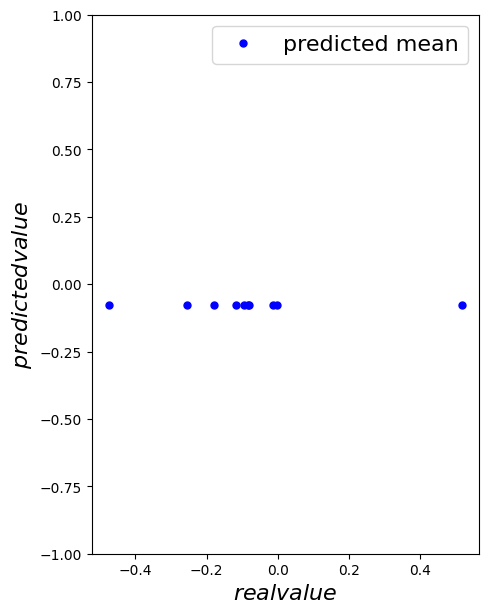

In [48]:
#model = TanimotoGP(X_explored[:300], y_acquired[:300])
model = TanimotoGP(X_explored_BO, y_acquired[:10])

mll = ExactMarginalLogLikelihood(model.likelihood, model)
fit_gpytorch_model(mll)
# plot the posterior
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(5, 7))
ax.plot(y_acquired[:10].tolist(),model.posterior(X_explored_BO).mean.squeeze().tolist(), 'b.', markersize=10, label='predicted mean')
ax.set_xlabel('$real value$', fontsize=16)
ax.set_ylabel('$predicted value$', fontsize=16)
ax.legend(loc='best', fontsize=16)
ax.set_ylim([-1,1])
plt.show()

In [52]:
from sklearn.preprocessing import StandardScaler
X_explored_BO=StandardScaler().fit_transform(X_explored_BO)
X_explored_BO=torch.from_numpy(X_explored_BO)
X_explored_BO

tensor([[ 7.5603e-01,  1.1932e+00,  5.8620e-01, -6.3660e-01,  4.5212e-01,
         -6.4400e-01, -8.9821e-01, -9.0253e-01, -9.1553e-01, -7.0336e-01,
         -9.8048e-01,  2.2360e+00, -1.5635e+00, -1.2002e+00, -1.5112e+00,
         -5.5699e-01, -1.6866e+00,  1.7320e+00, -1.5635e+00, -1.2002e+00,
         -1.5112e+00, -5.5699e-01, -1.6866e+00,  1.7320e+00,  7.5603e-01,
          1.1932e+00,  5.8620e-01, -6.3660e-01,  4.5212e-01, -6.4400e-01,
          7.5603e-01,  1.1932e+00,  5.8620e-01, -6.3660e-01,  4.5212e-01,
         -6.4400e-01],
        [-1.4043e+00, -1.0537e+00, -1.3549e+00, -6.2262e-01, -1.5219e+00,
          1.5584e+00,  4.7106e-02,  1.8281e+00,  6.3325e-02, -7.1982e-01,
          8.2817e-02, -4.5116e-01,  6.5763e-01,  1.0014e+00,  4.7790e-01,
         -5.7184e-01,  3.8388e-01, -5.7939e-01,  6.5763e-01,  1.0014e+00,
          4.7790e-01, -5.7184e-01,  3.8388e-01, -5.7939e-01, -1.4043e+00,
         -1.0537e+00, -1.3549e+00, -6.2262e-01, -1.5219e+00,  1.5584e+00,
         -1.404

c:\Users\ma11115\OneDrive - Imperial College London\github_folder\BO_polymers\.conda\lib\site-packages\botorch\models\utils\assorted.py:173: InputDataWarning: Input data is not contained to the unit cube. Please consider min-max scaling the input data.
  warnings.warn(msg, InputDataWarning)


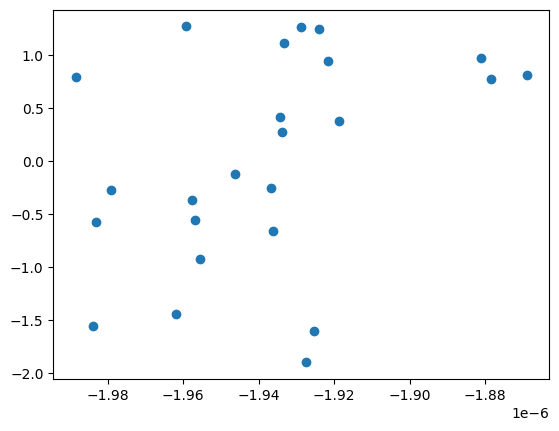

In [53]:
from gpytorch.mlls import ExactMarginalLogLikelihood as EMLL

Bayesian_Opt=Bayesian_Optimisation()
fitness_acquired = S_exp.fitness_acquired
ids_acquired = S_exp.ids_acquired
search_space_df = S_exp.df_search_space
searched_space_df = search_space_df.loc[np.array(ids_acquired)]
numeric_cols = searched_space_df.select_dtypes(include=['float64']).columns
from gpytorch.mlls import ExactMarginalLogLikelihood as EMLL

X_explored_BO = torch.tensor(
    searched_space_df[numeric_cols].values, dtype=torch.float64)
# limit the dataframe to only the numeric data
y_explored_BO = torch.tensor(
    fitness_acquired, dtype=torch.float64)
# normalise the data
if y_explored_BO.std() != 0:
    y_explored_BO_norm = (y_explored_BO - torch.mean(y_explored_BO)) / torch.std(y_explored_BO)
else:
    y_explored_BO_norm = y_explored_BO
#y_explored_BO_norm = y_explored_BO_norm.reshape(-1,1) # for the GP
model2 = TanimotoGP(X_explored_BO, y_explored_BO_norm)
mll = EMLL(model2.likelihood, model2)
fit_gpytorch_model(mll)
%matplotlib inline
from matplotlib import pyplot as plt
fig,ax=plt.subplots()
ax.scatter(model2.posterior(X_explored_BO).mean.tolist(),y_explored_BO_norm)

In [51]:
X_explored_BO[0]

tensor([3.6630e+00, 6.6400e-01, 3.9960e+00, 0.0000e+00, 4.3370e+00, 4.0000e-04,
        2.9740e+00, 7.0000e-03, 3.3500e+00, 4.5000e-03, 3.6790e+00, 6.0490e-01,
        2.9740e+00, 7.0000e-03, 3.3500e+00, 4.5000e-03, 3.6790e+00, 6.0490e-01,
        2.9740e+00, 7.0000e-03, 3.3500e+00, 4.5000e-03, 3.6790e+00, 6.0490e-01,
        3.6630e+00, 6.6400e-01, 3.9960e+00, 0.0000e+00, 4.3370e+00, 4.0000e-04,
        3.6630e+00, 6.6400e-01, 3.9960e+00, 0.0000e+00, 4.3370e+00, 4.0000e-04],
       dtype=torch.float64)

In [2]:
fig,ax=plt.subplots()
siz=X_explored_BO[:,0:1].unique().shape[0]
ax.scatter(X_explored_BO[:,0:1].unique(),y_explored_BO.sort().values[:siz])


NameError: name 'plt' is not defined

In [218]:
Bayesian_Opt=Bayesian_Optimisation()
fitness_acquired = S_exp.fitness_acquired
ids_acquired = S_exp.ids_acquired
searched_space_df = search_space_df.iloc[np.array(ids_acquired)]
numeric_cols = searched_space_df.select_dtypes(include=['float64', 'int64']).columns
X_explored_BO = torch.tensor(
    searched_space_df[numeric_cols].values, dtype=torch.float64)
# limit the dataframe to only the numeric data
y_explored_BO = torch.tensor(
    fitness_acquired, dtype=torch.float64)
# normalise the data
if y_explored_BO.std() != 0:
    y_explored_BO_norm = (y_explored_BO - y_explored_BO.mean()) / y_explored_BO.std()
else:
    y_explored_BO_norm = y_explored_BO
y_explored_BO_norm = y_explored_BO_norm.reshape(-1,1) # for the GP
model = Bayesian_Opt.kernel(X_explored_BO[:,0:3], y_explored_BO_norm)
mll = Bayesian_Opt.likelihood(model.likelihood, model)
fit_gpytorch_model(mll)

c:\Users\ma11115\OneDrive - Imperial College London\github_folder\BO_polymers\.conda\lib\site-packages\botorch\models\utils\assorted.py:173: InputDataWarning: Input data is not contained to the unit cube. Please consider min-max scaling the input data.
  warnings.warn(msg, InputDataWarning)


ExactMarginalLogLikelihood(
  (likelihood): GaussianLikelihood(
    (noise_covar): HomoskedasticNoise(
      (raw_noise_constraint): GreaterThan(1.000E-04)
    )
  )
  (model): TanimotoGP(
    (likelihood): GaussianLikelihood(
      (noise_covar): HomoskedasticNoise(
        (raw_noise_constraint): GreaterThan(1.000E-04)
      )
    )
    (mean_module): ConstantMean()
    (covar_module): ScaleKernel(
      (base_kernel): TanimotoKernel()
      (raw_outputscale_constraint): Positive()
    )
  )
)